<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Project Title: Medical Recommendation System with Machine Learning</p></b></h1>

### Tabel of Contents:

* [Import Libraries](#1)
* [Load Dataset](#2)
* [Preprocessing](#3)
* [ML Models](#4)
* [Logic for Recommendations](#5)
* [Like this? Upvote and comment! 🌊 End](#6)

**<a id="1"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Import Libraries</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Libraries for Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, f1_score, precision_score, recall_score
import pickle
# Models
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
# ignore warning
import warnings
warnings.filterwarnings('ignore')

**<a id="2"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Load Dataset</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>

In [125]:
dataset = pd.read_csv('C:/Users/Widnyana/Downloads/NAMA SAYA/MAHASISWA_NAMA SAYA_V1/Source/indo/Training.csv')
dataset.head()

,gatal,ruam kulit,erupsi_kulit_nodal,bersin_terus_menerus,gemetaran,panas dingin,nyeri sendi,sakit perut,keasaman,bisul_di_lidah,...,komedo,menggeliat,kulit_terkelupas,debu_seperti_perak,lekukan kecil pada kuku,kuku_inflamasi,lepuh,luka_merah_di_sekitar_hidung,kerak_kuning_cairan_kerak,prognosa
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Infeksi jamur
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Infeksi jamur
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Infeksi jamur
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Infeksi jamur
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Infeksi jamur


In [126]:
nan_count = dataset.isna().sum()
nan_count

gatal                           0
ruam kulit                      0
erupsi_kulit_nodal              0
bersin_terus_menerus            0
gemetaran                       0
                               ..
kuku_inflamasi                  0
lepuh                           0
luka_merah_di_sekitar_hidung    0
kerak_kuning_cairan_kerak       0
prognosa                        0
Length: 133, dtype: int64

In [127]:
dataset.shape

(4920, 133)

In [128]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, gatal to prognosa
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [129]:
description = pd.read_csv('C:/Users/Widnyana/Downloads/NAMA SAYA/MAHASISWA_NAMA SAYA_V1/Source/indo/new_desc.csv')


description.head()

,Penyakit,Keterangan
0,Infeksi jamur,Infeksi jamur adalah kondisi kulit umum yang d...
1,Alergi,Alergi adalah reaksi sistem kekebalan tubuh te...
2,Penyakit GERD,GERD (Gastroesophageal Reflux Disease) adalah ...
3,Kolestasis kronis,Kolestasis kronis merupakan suatu kondisi di m...
4,Reaksi Obat,Reaksi Obat terjadi ketika tubuh bereaksi nega...


In [130]:
# description.to_csv('new_desc.csv', index=False)

In [131]:
# Print unique values for each column
for column in description.columns:
    print(f"Unique values in '{column}': ")
    print(description[column].unique())
    print("\n")

Unique values in 'Penyakit': 
['Infeksi jamur' 'Alergi' 'Penyakit GERD' 'Kolestasis kronis'
 'Reaksi Obat' 'Penyakit tukak lambung' 'AIDS' 'Diabetes' 'Asma Bronkial'
 'Migrain' 'Spondilosis serviks' 'Kelumpuhan (pendarahan otak)' 'Malaria'
 'Cacar air' 'demam berdarah' 'Penyakit tipus' 'penyakit hepatitis A'
 'Penyakit Hepatitis B' 'Hepatitis C' 'Penyakit Hepatitis D.'
 'Hepatitis E' 'Hepatitis alkoholik' 'Tuberkulosis' 'Flu biasa'
 'Radang paru-paru' 'Wasir dimorfik (ambeien)' 'Serangan jantung'
 'Pembuluh mekar' 'Hipotiroidisme' 'Hipertiroidisme' 'Hipoglikemia'
 'Osteoartritis' '(vertigo) Vertigo Posisi Paraymsal' 'Jerawat'
 'Infeksi saluran kemih' 'Impetigo']


Unique values in 'Keterangan': 
['Infeksi jamur adalah kondisi kulit umum yang disebabkan oleh jamur.'
 'Alergi adalah reaksi sistem kekebalan tubuh terhadap suatu zat di lingkungan.'
 'GERD (Gastroesophageal Reflux Disease) adalah gangguan pencernaan yang menyerang sfingter esofagus bagian bawah.'
 'Kolestasis kronis merupak

In [132]:
description.shape

(36, 2)

In [133]:
description.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Penyakit    36 non-null     object
 1   Keterangan  36 non-null     object
dtypes: object(2)
memory usage: 704.0+ bytes


In [134]:
import pandas as pd

# Load the data
medications = pd.read_csv('C:/Users/Widnyana/Downloads/NAMA SAYA/MAHASISWA_NAMA SAYA_V1/Source/Apps/ind/Data-Indo/fix_medication.csv')

# Drop the 'Unnamed: 0' column
medications.drop(columns=['Unnamed: 0'], inplace=True)

# Display the first few rows to confirm the change
print(medications.head())


            Penyakit                                         Pengobatan
0      Infeksi jamur  KrimAntijamur,Flukonazol,Terbinafine,Klotrimaz...
1             Alergi  Antihistamin,Dekongestan,Epinefrin,Kortikoster...
2               GERD  InhibitorPompaProton(PPI),PemblokirH2,Antasida...
3  Kolestasis kronis  Asamursodeoksikolat,Kolestyramine,Methotrexate...
4        Reaksi Obat  Antihistamin,Epinefrin,Kortikosteroid,Antibiot...


In [135]:
# # Remove unwanted characters from the Pengobatan column
# medications['Pengobatan'] = medications['Pengobatan'].str.replace(r"[\[\]'\" ]", "", regex=True)

# # Display the first few rows to confirm the changes
# print(medications.head())

In [136]:
# medications.to_csv('fix_medication.csv')

In [137]:
# # Install googletrans if not already installed
# # !pip install googletrans==4.0.0-rc1

# import pandas as pd
# from googletrans import Translator

# # Load the medications CSV file
# file_path = 'C:/Users/Widnyana/Downloads/NAMA SAYA/MAHASISWA_NAMA SAYA_V1/Source/Apps/ind/Data-Indo/medications copy.csv'
# medications = pd.read_csv(file_path)

# # Initialize the translator
# translator = Translator()

# # Function to translate each cell in the DataFrame
# def translate_column(column):
#     return column.apply(lambda x: translator.translate(x, src='en', dest='id').text if isinstance(x, str) else x)

# # Display original data
# print("Original Data:")
# display(medications.head())

# # Specify columns to translate
# columns_to_translate = medications.columns  # You can select specific columns if needed

# # Translate each specified column
# for col in columns_to_translate:
#     medications[col] = translate_column(medications[col])

# # Display translated data
# print("Translated Data:")
# display(medications.head())

# # Save the translated DataFrame to a new CSV file
# output_file_path = 'C:/Users/Widnyana/Downloads/NAMA SAYA/MAHASISWA_NAMA SAYA_V1/Source/Apps/ind/Data-Indo/translated_medications.csv'
# medications.to_csv(output_file_path, index=False)
# print(f"Translated data saved to {output_file_path}")


In [138]:
medications.shape

(41, 2)

In [139]:
medications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Penyakit    41 non-null     object
 1   Pengobatan  41 non-null     object
dtypes: object(2)
memory usage: 784.0+ bytes


In [140]:
symtoms_df = pd.read_csv('C:/Users/Widnyana/Downloads/NAMA SAYA/MAHASISWA_NAMA SAYA_V1/Source/Apps/ind/Data-Indo/symtoms.csv')
symtoms_df.drop('Unnamed: 0', axis=1, inplace=True)
symtoms_df.head()


,Penyakit,Gejala_1,Gejala_2,Gejala_3,Gejala_4
0,Infeksi jamur,gatal,ruam kulit,erupsi_kulit_nodal,bercak diskromik
1,Infeksi jamur,ruam kulit,erupsi_kulit_nodal,bercak diskromik,kemerahan
2,Infeksi jamur,gatal,erupsi_kulit_nodal,bercak diskromik,kemerahan
3,Infeksi jamur,gatal,ruam kulit,bercak diskromik,perih
4,Infeksi jamur,gatal,ruam kulit,erupsi_kulit_nodal,nyeri


In [141]:
nan_indices = symtoms_df[symtoms_df.isna().any(axis=1)].index.tolist()
print("Indices with NaN values:", nan_indices)


Indices with NaN values: []


In [142]:
nan_count = symtoms_df.isna().sum()
nan_count


Penyakit    0
Gejala_1    0
Gejala_2    0
Gejala_3    0
Gejala_4    0
dtype: int64

In [143]:
# Displaying one row with NaN values
row_with_nan1 = symtoms_df[symtoms_df.isna().any(axis=1)]
print(row_with_nan1)


Empty DataFrame
Columns: [Penyakit, Gejala_1, Gejala_2, Gejala_3, Gejala_4]
Index: []


In [144]:
symtoms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Penyakit  4920 non-null   object
 1   Gejala_1  4920 non-null   object
 2   Gejala_2  4920 non-null   object
 3   Gejala_3  4920 non-null   object
 4   Gejala_4  4920 non-null   object
dtypes: object(5)
memory usage: 192.3+ KB


In [145]:
symptom_severity = pd.read_csv('C:/Users/Widnyana/Downloads/NAMA SAYA/MAHASISWA_NAMA SAYA_V1/Source/indo/Symptom-severity.csv')
symptom_severity.head()

,Gejala,berat
0,gatal,1
1,ruam kulit,3
2,erupsi_kulit_nodal,4
3,bersin_terus_menerus,4
4,gemetaran,5


In [146]:
# Counting the number of NaN values in each column
nan_count1 = symptom_severity.isna().sum()
nan_count1


Gejala    0
berat     0
dtype: int64

In [147]:
symptom_severity.shape

(133, 2)

In [148]:
symptom_severity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gejala  133 non-null    object
 1   berat   133 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [149]:
precautions_df = pd.read_csv('C:/Users/Widnyana/Downloads/NAMA SAYA/MAHASISWA_NAMA SAYA_V1/Source/Apps/ind/Data-Indo/new_pre.csv')
# precautions_df.drop('Unnamed: 0',axis=1,inplace=True)
precautions_df.head()

,Penyakit,Tindakan pencegahan_1,Tindakan pencegahan_2,Tindakan pencegahan_3,Tindakan pencegahan_4
0,Reaksi Obat,hentikan iritasi,konsultasikan ke rumah sakit terdekat,berhenti minum obat,menindaklanjuti
1,Malaria,Konsultasikan ke rumah sakit terdekat,hindari makanan berminyak,hindari makanan non-sayur,mengusir nyamuk
2,Alergi,oleskan calamine,tutupi area tersebut dengan perban,Gunakan es untuk mengompres gatal,Gunakan Produk Anti-Alergi di Rumah
3,Hipotiroidisme,mengurangi stres,latihan,makan sehat,tidur yang cukup
4,Psoriasis,cuci tangan dengan air sabun hangat,hentikan pendarahan dengan menggunakan tekanan,konsultasi dokter,mandi garam


In [150]:
precautions_df.shape

(41, 5)

In [151]:
precautions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Penyakit               41 non-null     object
 1   Tindakan pencegahan_1  41 non-null     object
 2   Tindakan pencegahan_2  41 non-null     object
 3   Tindakan pencegahan_3  41 non-null     object
 4   Tindakan pencegahan_4  41 non-null     object
dtypes: object(5)
memory usage: 1.7+ KB


In [152]:
nan_count = precautions_df.isna().sum()
nan_count


Penyakit                 0
Tindakan pencegahan_1    0
Tindakan pencegahan_2    0
Tindakan pencegahan_3    0
Tindakan pencegahan_4    0
dtype: int64

In [153]:
nan_indices = precautions_df[precautions_df.isna().any(axis=1)].index.tolist()
print("Indices with NaN values:", nan_indices)


Indices with NaN values: []


In [154]:
# Displaying one row with NaN values
row_with_nan = precautions_df[precautions_df.isna().any(axis=1)]
print(row_with_nan)


Empty DataFrame
Columns: [Penyakit, Tindakan pencegahan_1, Tindakan pencegahan_2, Tindakan pencegahan_3, Tindakan pencegahan_4]
Index: []


In [155]:
diets = pd.read_csv('C:/Users/Widnyana/Downloads/NAMA SAYA/MAHASISWA_NAMA SAYA_V1/Source/Apps/ind/Data-Indo/fix_diets.csv')
# Drop the 'Unnamed: 0' column
diets.drop(columns=['Unnamed: 0'], inplace=True)
diets.head()

,Penyakit,Diet
0,Infeksi jamur,"DietAntijamur,Probiotik,BawangPutih,MinyakKela..."
1,Alergi,"DietEliminasi,MakanankayaOmega-3,MakanankayaVi..."
2,Penyakit GERD,"DietRendahAsam,MakananKayaSerat,Jahe,AkarManis..."
3,Kolestasis kronis,"DietRendahLemak,DietTinggiSerat,ProteinRendahL..."
4,Reaksi Obat,"DietAntihistamin,MakanankayaOmega-3,Makanankay..."


In [156]:
# # Remove unwanted characters from the Pengobatan column
# diets['Diet'] = diets['Diet'].str.replace(r"[\[\]'\" ]", "", regex=True)

# # Display the first few rows to confirm the changes
# print(diets.head())

In [157]:
# diets.to_csv('fix_diets.csv')

In [158]:
diets.shape

(41, 2)

In [159]:
nan_count = diets.isna().sum()
nan_count


Penyakit    0
Diet        0
dtype: int64

In [160]:
diets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Penyakit  41 non-null     object
 1   Diet      41 non-null     object
dtypes: object(2)
memory usage: 784.0+ bytes


In [161]:
workout_df = pd.read_csv('C:/Users/Widnyana/Downloads/NAMA SAYA/MAHASISWA_NAMA SAYA_V1/Source/indo/workout.csv',usecols=[2,3])
workout_df.head()

,penyakit,olahraga
0,Infeksi jamur,Hindari makanan manis
1,Infeksi jamur,Mengonsumsi probiotik
2,Infeksi jamur,Tingkatkan asupan bawang putih
3,Infeksi jamur,Sertakan yogurt dalam diet Anda
4,Infeksi jamur,Batasi makanan olahan


In [162]:
nan_count = workout_df.isna().sum()
nan_count


penyakit    0
olahraga    0
dtype: int64

In [163]:
workout_df.shape

(410, 2)

In [164]:
workout_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   penyakit  410 non-null    object
 1   olahraga  410 non-null    object
dtypes: object(2)
memory usage: 6.5+ KB


In [165]:
names = dataset.prognosa.unique()
names

array(['Infeksi jamur', 'Alergi', 'Penyakit GERD', 'Kolestasis kronis',
       'Reaksi Obat', 'Penyakit tukak lambung', 'AIDS', 'Diabetes',
       'Radang perut', 'Asma Bronkial', 'Hipertensi', 'Migrain',
       'Spondilosis serviks', 'Kelumpuhan (pendarahan otak)',
       'Penyakit kuning', 'Malaria', 'Cacar air', 'Demam Berdarah',
       'Penyakit tipus', 'penyakit hepatitis A', 'Penyakit Hepatitis B',
       'Penyakit Hepatitis C', 'Penyakit Hepatitis D.', 'Hepatitis E',
       'Hepatitis alkoholik', 'Tuberkulosis', 'Flu biasa',
       'Radang paru-paru', 'Wasir dimorfik (ambeien)', 'Serangan jantung',
       'Pembuluh mekar', 'Hipotiroidisme', 'Hipertiroidisme',
       'Hipoglikemia', 'Osteoartritis', 'Radang sendi',
       '(vertigo) Vertigo Posisi Paroymsal', 'Jerawat',
       'Infeksi saluran kemih', 'Psoriasis', 'Impetigo'], dtype=object)

In [166]:
len(dataset.prognosa.unique())

41

In [167]:
value_counts = dataset.prognosa.value_counts()
value_counts 

Infeksi jamur                         120
Penyakit Hepatitis C                  120
Hepatitis E                           120
Hepatitis alkoholik                   120
Tuberkulosis                          120
Flu biasa                             120
Radang paru-paru                      120
Wasir dimorfik (ambeien)              120
Serangan jantung                      120
Pembuluh mekar                        120
Hipotiroidisme                        120
Hipertiroidisme                       120
Hipoglikemia                          120
Osteoartritis                         120
Radang sendi                          120
(vertigo) Vertigo Posisi Paroymsal    120
Jerawat                               120
Infeksi saluran kemih                 120
Psoriasis                             120
Penyakit Hepatitis D.                 120
Penyakit Hepatitis B                  120
Alergi                                120
penyakit hepatitis A                  120
Penyakit GERD                     

**<a id="3"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Preprocessing</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>

In [168]:
### Transform Object Columns into Numbers
label = LabelEncoder()
dataset.prognosa = label.fit_transform(dataset.prognosa)
dataset.head()

,gatal,ruam kulit,erupsi_kulit_nodal,bersin_terus_menerus,gemetaran,panas dingin,nyeri sendi,sakit perut,keasaman,bisul_di_lidah,...,komedo,menggeliat,kulit_terkelupas,debu_seperti_perak,lekukan kecil pada kuku,kuku_inflamasi,lepuh,luka_merah_di_sekitar_hidung,kerak_kuning_cairan_kerak,prognosa
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15


In [169]:
### Split 
X = dataset.drop('prognosa',axis=1)
y = dataset['prognosa']
keys = X.columns
X.head()

,gatal,ruam kulit,erupsi_kulit_nodal,bersin_terus_menerus,gemetaran,panas dingin,nyeri sendi,sakit perut,keasaman,bisul_di_lidah,...,jerawat_berisi_nanah,komedo,menggeliat,kulit_terkelupas,debu_seperti_perak,lekukan kecil pada kuku,kuku_inflamasi,lepuh,luka_merah_di_sekitar_hidung,kerak_kuning_cairan_kerak
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [170]:
y.head()

0    15
1    15
2    15
3    15
4    15
Name: prognosa, dtype: int32

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=41, shuffle =True,stratify=y)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (3936, 132)
X_test shape is  (984, 132)
y_train shape is  (3936,)
y_test shape is  (984,)


**<a id="4"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">ML Models</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>

In [172]:
models = {
    'RandomForest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'LGBM': LGBMClassifier(verbose=-1),
    'DecisionTree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(),
    'LogisticRegression': LogisticRegression()
}
### Validation Score
cv_results = {}
for model_name, model in models.items():
    print(f"Cross-validating {model_name}...")
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
    cv_results[model_name] = cv_scores.mean()
    print(f"Mean accuracy for {model_name}: {cv_scores.mean():.4f}")

Cross-validating RandomForest...


Mean accuracy for RandomForest: 1.0000
Cross-validating XGBoost...
Mean accuracy for XGBoost: 0.9990
Cross-validating LGBM...
Mean accuracy for LGBM: 0.9990
Cross-validating DecisionTree...
Mean accuracy for DecisionTree: 0.9985
Cross-validating KNN...
Mean accuracy for KNN: 1.0000
Cross-validating SVC...
Mean accuracy for SVC: 1.0000
Cross-validating LogisticRegression...
Mean accuracy for LogisticRegression: 1.0000


In [173]:
cv_results_df = pd.DataFrame(list(cv_results.items()), columns=['Model', 'Mean Accuracy'])
cv_results_df = cv_results_df.sort_values(by='Mean Accuracy', ascending=False)
cv_results_df

,Model,Mean Accuracy
0,RandomForest,1.000000
4,KNN,1.000000
5,SVC,1.000000
6,LogisticRegression,1.000000
1,XGBoost,0.998985
2,LGBM,0.998985
3,DecisionTree,0.998477


In [174]:
best_model_name = cv_results_df.iloc[0]['Model']
print(f"\nBest model from CV: {best_model_name}")


Best model from CV: RandomForest


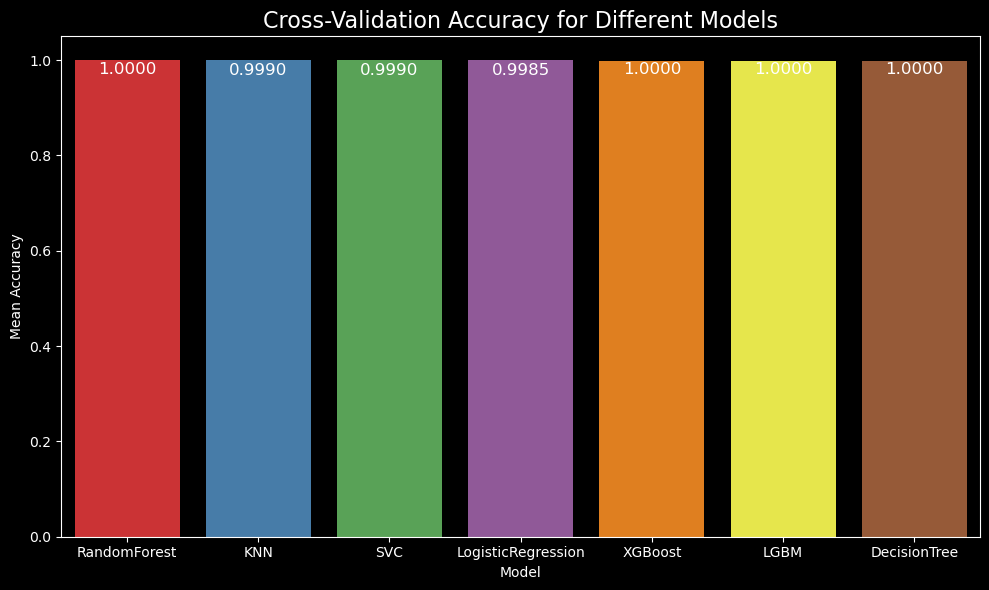

In [175]:
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
sns.barplot(data=cv_results_df, x='Model', y='Mean Accuracy', palette="Set1")
plt.title('Cross-Validation Accuracy for Different Models', fontsize=16, color='white')
plt.xlabel('Model', color='white')
plt.ylabel('Mean Accuracy', color='white')
for index, row in cv_results_df.iterrows():
    plt.text(index, row['Mean Accuracy'] - 0.02, f'{row["Mean Accuracy"]:.4f}', 
             color='white', ha="center", va="center", fontsize=12)
plt.tight_layout()
plt.show()

In [176]:
# ### Search best Parameters
# param_grids = {
#     'RandomForest': {'n_estimators': [10, 20, 30, 40], 'max_depth': [None, 10, 20, 30, 40], 'min_samples_split': [2, 5, 10]},
#     'XGBoost': {'max_depth': [3, 5, 7], 'n_estimators': [50, 60, 70], 'subsample': [0.6, 0.8, 1], 'learning_rate': [0.01, 0.1, 0.2]},
#     'LGBM': {'n_estimators': [50, 100, 150], 'max_depth': [-1, 5, 10], 'learning_rate': [0.01, 0.05, 0.1]},
#     'DecisionTree': {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]},
#     'KNN': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'p': [1, 2]},
#     'SVC': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto']},
#     'LogisticRegression': {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}
# }
# best_results = []
# for model_name, model in models.items():
#     print(f"\nPerforming GridSearchCV for {model_name}...")
#     grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
#     grid_search.fit(X_train, y_train)
#     best_params = grid_search.best_params_
#     best_score = grid_search.best_score_
#     # Store the best score and parameters
#     best_results.append({'Model': model_name, 'Best Score': best_score, 'Best Params': best_params})
#     print(f"\nBest parameters for {model_name}: {best_params}")
#     print(f"Best cross-validation score for {model_name}: {best_score:.4f}")

In [177]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for RandomForest
param_grid_rf = {
    'n_estimators': [10, 20, 30, 40],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10]
}

# Initialize the RandomForest model
rf_model = RandomForestClassifier()

# Set up GridSearchCV for RandomForest
print("Performing GridSearchCV for RandomForest...")
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

# Output the best score and parameters
print(f"\nBest parameters for RandomForest: {best_params_rf}")
print(f"Best cross-validation score for RandomForest: {best_score_rf:.4f}")


Performing GridSearchCV for RandomForest...
Fitting 5 folds for each of 60 candidates, totalling 300 fits

Best parameters for RandomForest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 10}
Best cross-validation score for RandomForest: 1.0000


In [178]:
import pandas as pd

# Store the best result for RandomForest in a dictionary
best_result_rf = {
    'Model': 'RandomForest',
    'Best Score': best_score_rf,
    'Best Params': best_params_rf
}

# Convert the dictionary to a DataFrame
best_results_df = pd.DataFrame([best_result_rf])

# Display the DataFrame
best_results_df


,Model,Best Score,Best Params
0,RandomForest,1.0,"{'max_depth': None, 'min_samples_split': 2, 'n..."


In [179]:
best_model_name, best_model_param = best_results_df.iloc[0]['Model'],best_results_df.iloc[0]['Best Params']
print(f"\nBest model : {best_model_name}")
print(f"\nBest Parameters : {best_model_param}")


Best model : RandomForest

Best Parameters : {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 10}


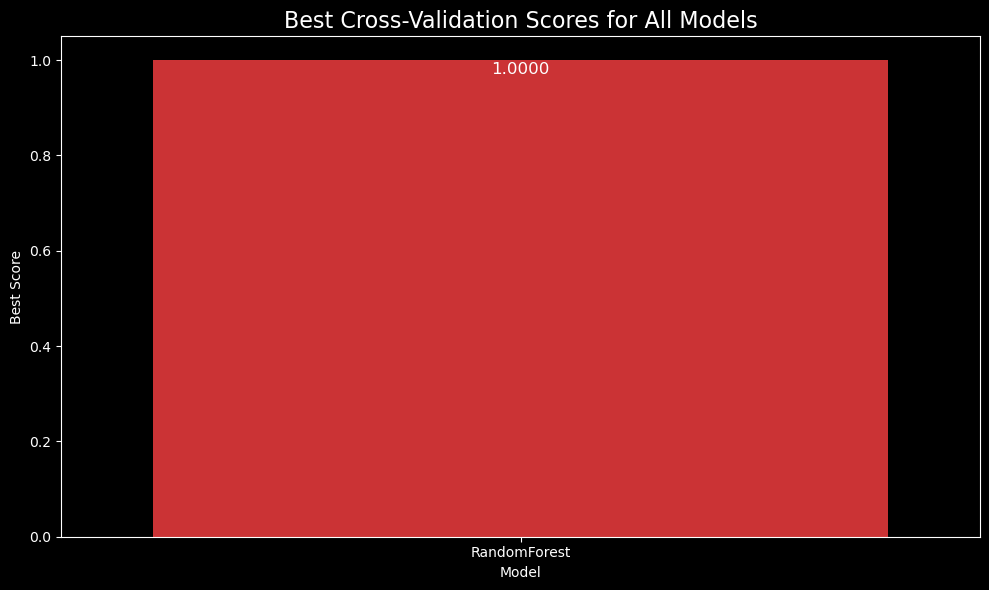

In [180]:
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
sns.barplot(data=best_results_df, x='Model', y='Best Score', palette="Set1")
plt.title('Best Cross-Validation Scores for All Models', fontsize=16, color='white')
plt.xlabel('Model', color='white')
plt.ylabel('Best Score', color='white')
for index, row in best_results_df.iterrows():
    plt.text(index, row['Best Score'] - 0.02, f'{row["Best Score"]:.4f}', 
             color='white', ha="center", va="center", fontsize=12)
plt.tight_layout()
plt.show()

In [181]:
########## Best Model Training
model = RandomForestClassifier(max_depth = None, min_samples_split = 2, n_estimators = 10)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [182]:
### Evaluate the model
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred,average='micro')  
train_recall = recall_score(y_train, y_train_pred,average='micro')  
train_f1 = f1_score(y_train, y_train_pred,average='micro')  
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred,average='micro') 
test_recall = recall_score(y_test, y_test_pred,average='micro')  
test_f1 = f1_score(y_test, y_test_pred,average='micro') 
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Training Precision: {train_precision:.2f}')
print(f'Training Recall: {train_recall:.2f}')
print(f'Training F1-Score: {train_f1:.2f}')
print('---')
print(f'Test Accuracy: {test_accuracy:.2f}')
print(f'Test Precision: {test_precision:.2f}')
print(f'Test Recall: {test_recall:.2f}')
print(f'Test F1-Score: {test_f1:.2f}')

Training Accuracy: 1.00
Training Precision: 1.00
Training Recall: 1.00
Training F1-Score: 1.00
---
Test Accuracy: 1.00
Test Precision: 1.00
Test Recall: 1.00
Test F1-Score: 1.00


Confusion Matrix is : 
 [[24  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 24  0  0]
 [ 0  0  0 ...  0 24  0]
 [ 0  0  0 ...  0  0 24]]


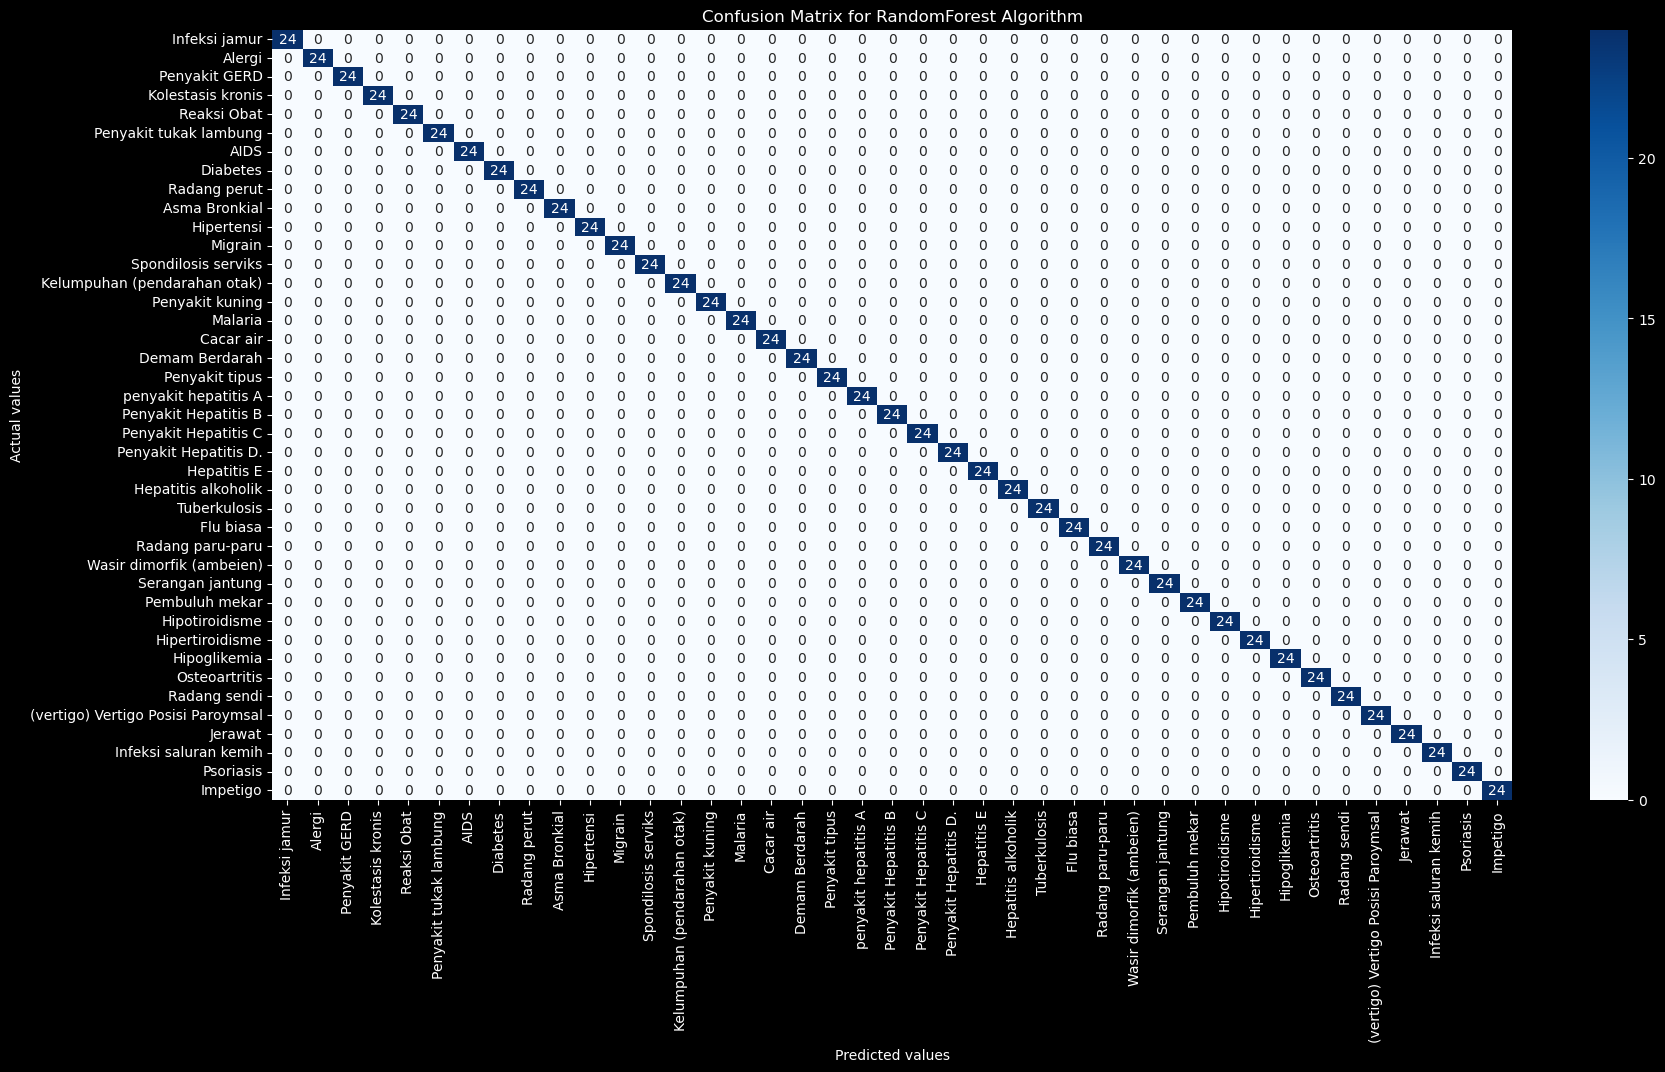

In [183]:
### Check model
CM = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix is : \n', CM)
plt.figure(figsize=(20,10))
sns.heatmap(data=CM, annot=True,fmt='g', cmap="Blues", xticklabels=names, yticklabels=names)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title(f'Confusion Matrix for {best_model_name} Algorithm')
plt.show()

In [184]:
ClassificationReport = classification_report(y_test,y_test_pred,target_names=names)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                                      precision    recall  f1-score   support

                     Infeksi jamur       1.00      1.00      1.00        24
                            Alergi       1.00      1.00      1.00        24
                     Penyakit GERD       1.00      1.00      1.00        24
                 Kolestasis kronis       1.00      1.00      1.00        24
                       Reaksi Obat       1.00      1.00      1.00        24
            Penyakit tukak lambung       1.00      1.00      1.00        24
                              AIDS       1.00      1.00      1.00        24
                          Diabetes       1.00      1.00      1.00        24
                      Radang perut       1.00      1.00      1.00        24
                     Asma Bronkial       1.00      1.00      1.00        24
                        Hipertensi       1.00      1.00      1.00        24
                           Migrain       1.00      1.00    

In [185]:
pickle.dump(model,open('random_indo.pkl','wb'))

In [186]:

for model_name, model in models.items():
    print(f"Cross-validating {model_name}...")
    
    # Cross-validate and get the mean accuracy
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
    cv_results[model_name] = cv_scores.mean()
    print(f"Mean accuracy for {model_name}: {cv_scores.mean():.4f}")
    
    # Train the model on the full training set
    model.fit(X_train, y_train)
    
    # Save each model to a separate pickle file
    filename = f"{model_name}_model.pkl"
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print(f"{model_name} model saved to {filename}.")


Cross-validating RandomForest...
Mean accuracy for RandomForest: 1.0000
RandomForest model saved to RandomForest_model.pkl.
Cross-validating XGBoost...
Mean accuracy for XGBoost: 0.9990
XGBoost model saved to XGBoost_model.pkl.
Cross-validating LGBM...
Mean accuracy for LGBM: 0.9990
LGBM model saved to LGBM_model.pkl.
Cross-validating DecisionTree...
Mean accuracy for DecisionTree: 0.9985
DecisionTree model saved to DecisionTree_model.pkl.
Cross-validating KNN...
Mean accuracy for KNN: 1.0000
KNN model saved to KNN_model.pkl.
Cross-validating SVC...
Mean accuracy for SVC: 1.0000
SVC model saved to SVC_model.pkl.
Cross-validating LogisticRegression...
Mean accuracy for LogisticRegression: 1.0000
LogisticRegression model saved to LogisticRegression_model.pkl.


Cross-validating RandomForest...
Mean accuracy for RandomForest: 1.0000
Training time for RandomForest: 1.4287 seconds
Cross-validating XGBoost...
Mean accuracy for XGBoost: 0.9990
Training time for XGBoost: 22.2681 seconds
Cross-validating LGBM...
Mean accuracy for LGBM: 0.9990
Training time for LGBM: 17.0495 seconds
Cross-validating DecisionTree...
Mean accuracy for DecisionTree: 0.9985
Training time for DecisionTree: 0.2469 seconds
Cross-validating KNN...
Mean accuracy for KNN: 1.0000
Training time for KNN: 0.3702 seconds
Cross-validating SVC...
Mean accuracy for SVC: 1.0000
Training time for SVC: 0.9317 seconds
Cross-validating LogisticRegression...
Mean accuracy for LogisticRegression: 1.0000
Training time for LogisticRegression: 0.7091 seconds


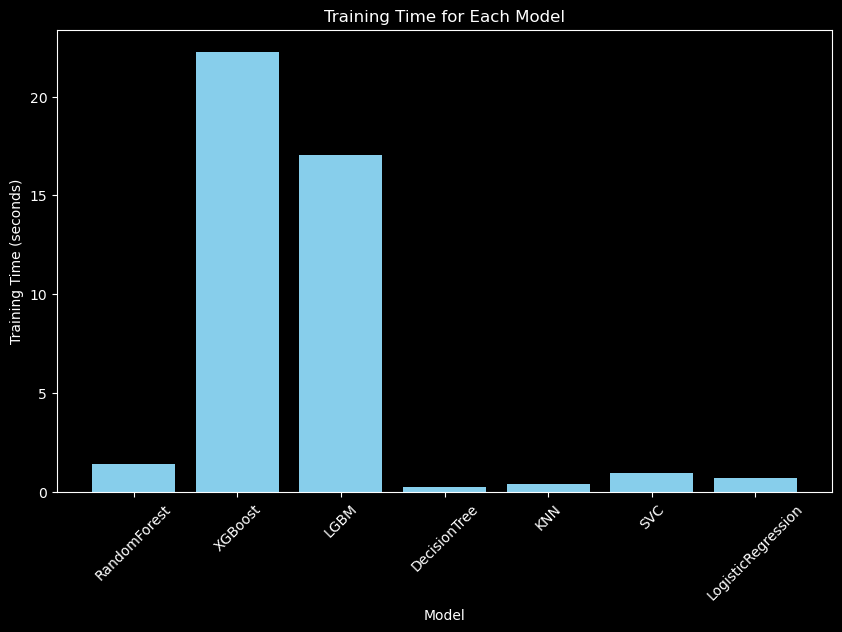

In [187]:
import pickle
import time
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Define the models
models = {
    'RandomForest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'LGBM': LGBMClassifier(verbose=-1),
    'DecisionTree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(),
    'LogisticRegression': LogisticRegression()
}

# Dictionary to store validation scores and training times
cv_results = {}
training_times = {}

for model_name, model in models.items():
    print(f"Cross-validating {model_name}...")
    
    # Measure training time
    start_time = time.time()
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
    model.fit(X_train, y_train)
    end_time = time.time()
    
    # Calculate mean accuracy and training time
    cv_results[model_name] = cv_scores.mean()
    training_times[model_name] = end_time - start_time
    print(f"Mean accuracy for {model_name}: {cv_scores.mean():.4f}")
    print(f"Training time for {model_name}: {training_times[model_name]:.4f} seconds")
    
    # # Save each model to a pickle file
    # filename = f"{model_name}_model.pkl"
    # with open(filename, 'wb') as file:
    #     pickle.dump(model, file)
    # print(f"{model_name} model saved to {filename}.")

# Plotting training times
plt.figure(figsize=(10, 6))
plt.bar(training_times.keys(), training_times.values(), color='skyblue')
plt.xlabel('Model')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time for Each Model')
plt.xticks(rotation=45)
plt.show()


Cross-validating RandomForest...


Mean accuracy for RandomForest: 1.0000
Training time for RandomForest: 1.9789 seconds
Peak memory usage for RandomForest: 290.3359 MB
Cross-validating XGBoost...
Mean accuracy for XGBoost: 1.0000
Training time for XGBoost: 20.1799 seconds
Peak memory usage for XGBoost: 297.9141 MB
Cross-validating LGBM...
Mean accuracy for LGBM: 1.0000
Training time for LGBM: 16.0390 seconds
Peak memory usage for LGBM: 305.7695 MB
Cross-validating DecisionTree...
Mean accuracy for DecisionTree: 1.0000
Training time for DecisionTree: 1.2281 seconds
Peak memory usage for DecisionTree: 299.4414 MB
Cross-validating KNN...
Mean accuracy for KNN: 1.0000
Training time for KNN: 1.2757 seconds
Peak memory usage for KNN: 299.5703 MB
Cross-validating SVC...
Mean accuracy for SVC: 1.0000
Training time for SVC: 1.6563 seconds
Peak memory usage for SVC: 303.5625 MB
Cross-validating LogisticRegression...
Mean accuracy for LogisticRegression: 1.0000
Training time for LogisticRegression: 1.4689 seconds
Peak memory usag

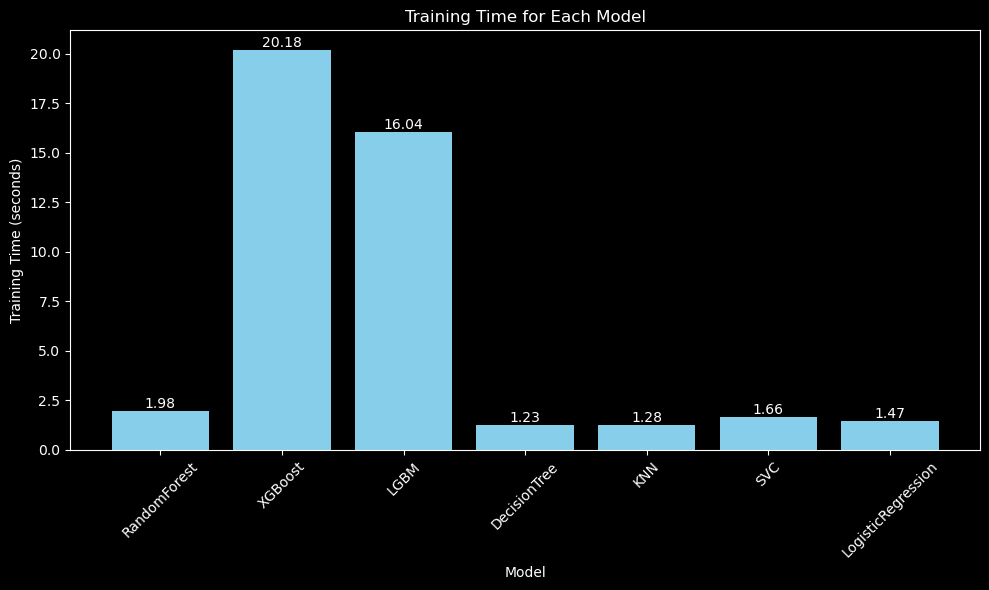

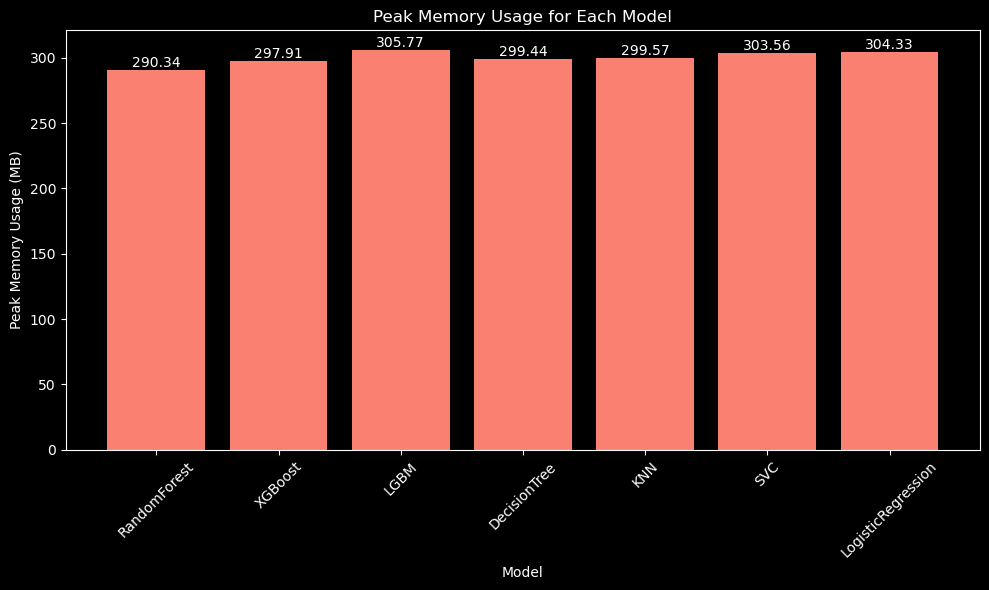

In [188]:
import pickle
import time
import matplotlib.pyplot as plt
from memory_profiler import memory_usage
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Define the models
models = {
    'RandomForest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'LGBM': LGBMClassifier(verbose=-1),
    'DecisionTree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(),
    'LogisticRegression': LogisticRegression()
}

# Dictionaries to store validation scores, training times, and memory usage
cv_results = {}
training_times = {}
memory_usages = {}

for model_name, model in models.items():
    print(f"Cross-validating {model_name}...")
    
    # Measure training time and memory usage
    start_time = time.time()
    mem_usage = memory_usage((cross_val_score, (model, X_train, y_train), {'cv': 5, 'scoring': 'accuracy', 'n_jobs': -1}), interval=0.1)
    training_time = time.time() - start_time
    
    # Train model on full dataset
    model.fit(X_train, y_train)
    
    # Save results
    cv_results[model_name] = cv_scores.mean()
    training_times[model_name] = training_time
    memory_usages[model_name] = max(mem_usage)  # Peak memory usage
    print(f"Mean accuracy for {model_name}: {cv_results[model_name]:.4f}")
    print(f"Training time for {model_name}: {training_time:.4f} seconds")
    print(f"Peak memory usage for {model_name}: {memory_usages[model_name]:.4f} MB")
    
    # # Save each model to a pickle file
    # filename = f"{model_name}_model.pkl"
    # with open(filename, 'wb') as file:
    #     pickle.dump(model, file)
    # print(f"{model_name} model saved to {filename}.")

# Plotting Training Time
plt.figure(figsize=(10, 6))
plt.bar(training_times.keys(), training_times.values(), color='skyblue')
plt.xlabel('Model')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time for Each Model')
plt.xticks(rotation=45)
for index, value in enumerate(training_times.values()):
    plt.text(index, value, f"{value:.2f}", ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Plotting Memory Usage
plt.figure(figsize=(10, 6))
plt.bar(memory_usages.keys(), memory_usages.values(), color='salmon')
plt.xlabel('Model')
plt.ylabel('Peak Memory Usage (MB)')
plt.title('Peak Memory Usage for Each Model')
plt.xticks(rotation=45)
for index, value in enumerate(memory_usages.values()):
    plt.text(index, value, f"{value:.2f}", ha='center', va='bottom')
plt.tight_layout()
plt.show()


**<a id="5"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Logic for Recommendations</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>

In [189]:
symptoms_dict = {}
diseases_list = {}
for name in names:
    diseases_list[label.transform([name])[0]] = name
with open('diseases_list.pkl', 'wb') as f:
    pickle.dump(diseases_list, f)
for i,name in enumerate(keys):
    symptoms_dict[name] = i
with open('symptoms_dict.pkl', 'wb') as f:
    pickle.dump(symptoms_dict, f)
print('*******************symptoms_dict*****************\n\n',symptoms_dict)
print('\n\n*******************diseases_list*****************\n\n',diseases_list)

*******************symptoms_dict*****************

 {'gatal': 0, 'ruam kulit': 1, 'erupsi_kulit_nodal': 2, 'bersin_terus_menerus': 3, 'gemetaran': 4, 'panas dingin': 5, 'nyeri sendi': 6, 'sakit perut': 7, 'keasaman': 8, 'bisul_di_lidah': 9, 'pemborosan_otot': 10, 'muntah': 11, 'pembakaran_kemih': 12, 'bercak_buang air kecil': 13, 'kelelahan': 14, 'berat_naik': 15, 'kecemasan': 16, 'tangan dan kaki dingin': 17, 'perubahan suasana hati': 18, 'penurunan_berat_badan': 19, 'kegelisahan': 20, 'kelesuan': 21, 'bercak_di_tenggorokan': 22, 'kadar_gula_tidak_beraturan': 23, 'batuk': 24, 'demam tinggi': 25, 'mata_cekung': 26, 'sesak napas': 27, 'berkeringat': 28, 'dehidrasi': 29, 'gangguan pencernaan': 30, 'sakit kepala': 31, 'kulit kekuningan': 32, 'urin_gelap': 33, 'mual': 34, 'kehilangan_nafsu_nafsu_makan': 35, 'nyeri di belakang mata': 36, 'sakit punggung': 37, 'sembelit': 38, 'nyeri perut': 39, 'diare': 40, 'demam ringan': 41, 'urin_kuning': 42, 'menguningnya_mata': 43, 'gagal_hati_akut': 44

In [190]:
symtoms_df = pd.read_csv('C:/Users/Widnyana/Downloads/NAMA SAYA/MAHASISWA_NAMA SAYA_V1/Source/indo/workout.csv')
symtoms_df.drop('Tanpa Nama: 0',axis=1,inplace=True)
symtoms_df.head()

,Unnamed: 0,penyakit,olahraga
0,0,Infeksi jamur,Hindari makanan manis
1,1,Infeksi jamur,Mengonsumsi probiotik
2,2,Infeksi jamur,Tingkatkan asupan bawang putih
3,3,Infeksi jamur,Sertakan yogurt dalam diet Anda
4,4,Infeksi jamur,Batasi makanan olahan


In [191]:
# Model Prediction function
def get_predicted_value(patient_symptoms):
    input_vector = np.zeros(len(symptoms_dict))
    for item in patient_symptoms:
        input_vector[symptoms_dict[item]] = 1
    return diseases_list[model.predict([input_vector])[0]]

symptoms = 'kuku_inflamasi, lepuh, luka_merah_di_sekitar_hidung, kerak_kuning_cairan_kerak'
user_symptoms = [s.strip() for s in symptoms.split(',')]

predicted_disease = get_predicted_value(user_symptoms)
def helper(dis):
    desc = description[description['Penyakit'] == predicted_disease]['Keterangan']
    desc = " ".join([w for w in desc])

    pre = precautions_df[precautions_df['Penyakit'] == dis][['Tindakan pencegahan_1', 'Tindakan pencegahan_2', 'Tindakan pencegahan_3', 'Tindakan pencegahan_4']]
    pre = [col for col in pre.values]

    med = medications[medications['Penyakit'] == dis]['Pengobatan']
    med = [med for med in med.values]

    die = diets[diets['Penyakit'] == dis]['Diet']
    die = [die for die in die.values]

    wrkout = workout_df[workout_df['penyakit'] == dis] ['olahraga']


    return desc,pre,med,die,wrkout



In [192]:
symptoms = 'kuku_inflamasi, lepuh, luka_merah_di_sekitar_hidung, kerak_kuning_cairan_kerak'
user_symptoms = [s.strip() for s in symptoms.split(',')]

predicted_disease = get_predicted_value(user_symptoms)

desc, pre, med, die, wrkout = helper(predicted_disease)

print("=================predicted disease============")
print(predicted_disease)
print("=================description==================")
print(desc)
print("=================precautions==================")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1

print("=================medications==================")
i = 1
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print("=================workout==================")
i = 1
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1

print("=================diets==================")
i = 1
for d_i in die:
    print(i, ": ", d_i)
    i += 1

=================predicted disease============
Impetigo
=================description==================
Impetigo adalah infeksi kulit yang sangat menular yang menyebabkan luka merah yang dapat pecah.
=================precautions==================
1 :  rendam bagian yang terkena dengan air hangat
2 :  menggunakan antibiotik
3 :  menghilangkan keropeng dengan kain basah yang dikompres
4 :  konsultasi dokter
=================medications==================
1 :  Antibiotiktopikal,Antibiotikoral,Antiseptik,Salep,Kompreshangat
=================workout==================
1 :  Jaga kebersihan dengan baik
2 :  Tetap terhidrasi
3 :  Konsumsi makanan yang kaya nutrisi
4 :  Batasi makanan dan minuman manis
5 :  Sertakan makanan yang kaya vitamin C
6 :  Konsultasikan dengan tenaga kesehatan profesional
7 :  Ikuti anjuran medis
8 :  Hindari menggaruk
9 :  Minum antibiotik yang diresepkan
10 :  Berlatih perawatan luka
=================diets==================
1 :  DietImpetigo,Pengobatanantibiotik,Buahdan

**<a id="6"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Like this? Upvote and comment! 🌊 End</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>